
#  Extracting features for correlation


##  Assignment 

In this exercise, you'll work with a version of the `salaries` dataset containing a new column called `"date_of_response"`.

The dataset has been read in as a pandas DataFrame, with `"date_of_response"` as a `datetime` data type.

Your task is to extract datetime attributes from this column and then create a heat map to visualize the correlation coefficients between variables.

Seaborn has been imported for you as `sns`, `pandas` as `pd`, and `matplotlib.pyplot` as `plt`.

##  Pre exercise code 

```
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

salaries = pd.read_csv("https://assets.datacamp.com/production/repositories/6180/datasets/03025bd963fc9a29a0cb671f99fb7815765c9e19/ds_salaries_date_added.csv", parse_dates=["date_of_response"])
```



##  Instructions 

- Extract the month from `"date_of_response"`, storing it as a column called `"month"`.
- Create the `"weekday"` column, containing the weekday that the participants completed the survey.
- Plot a heat map, including the Pearson correlation coefficient scores.


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

divorce = pd.read_csv("divorce.csv", parse_dates=["divorce_date", "dob_man", "dob_woman", "marriage_date"])

<Axes: >

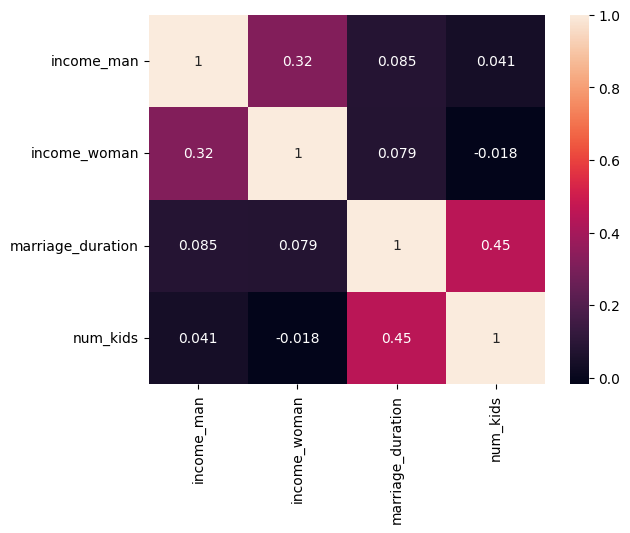

In [40]:
sns.heatmap(divorce.corr(numeric_only=True), annot=True)

In [41]:
divorce['man_age'] = divorce['marriage_date'].dt.year - divorce['dob_man'].dt.year
divorce['woman_age'] = divorce['marriage_date'].dt.year - divorce['dob_woman'].dt.year

In [42]:
divorce.head(1)

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,man_age,woman_age
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,25,17


In [43]:
man_0 = divorce['man_age'].min()
man_1 = divorce['man_age'].quantile(0.33)
man_2 = divorce['man_age'].quantile(0.66)
man_3 = divorce['man_age'].max()
woman_0 = divorce['woman_age'].min()
woman_1 = divorce['woman_age'].quantile(0.33)
woman_2 = divorce['woman_age'].quantile(0.66)
woman_3 = divorce['woman_age'].max()

In [44]:
age_label = ['young', 'mid', 'old']

In [45]:
age_range_man = [man_0, man_1, man_2, man_3]
age_range_woman = [woman_0, woman_1, woman_2, woman_3]

In [46]:
divorce['man_age_category'] = pd.cut(divorce['man_age'],
                                    labels=age_label,
                                    bins=age_range_man)
divorce['woman_age_category'] = pd.cut(divorce['woman_age'],
                                      labels=age_label,
                                      bins=age_range_woman)

In [47]:
divorce.head(1)

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,man_age,woman_age,man_age_category,woman_age_category
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,25,17,mid,young


<Axes: >

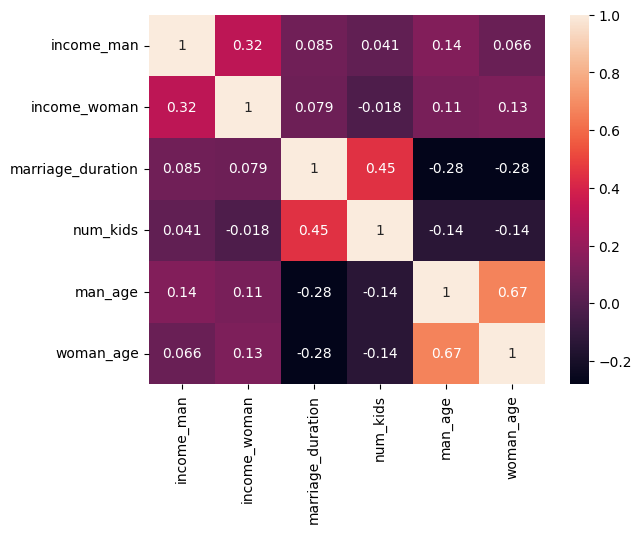

In [50]:
sns.heatmap(divorce.corr(numeric_only=True), annot=True)

<Axes: xlabel='man_age_category', ylabel='count'>

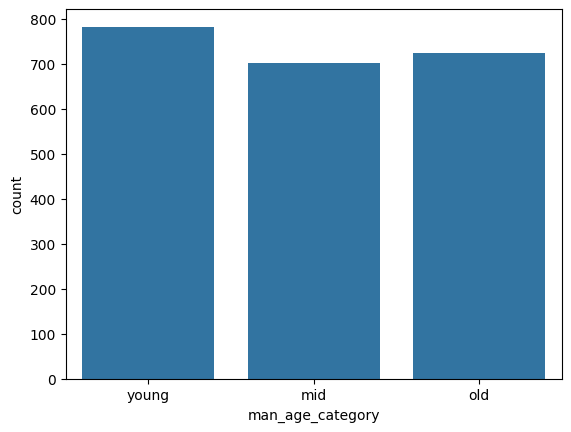

In [58]:
sns.countplot(data=divorce, x='man_age_category')

<Axes: xlabel='woman_age_category', ylabel='count'>

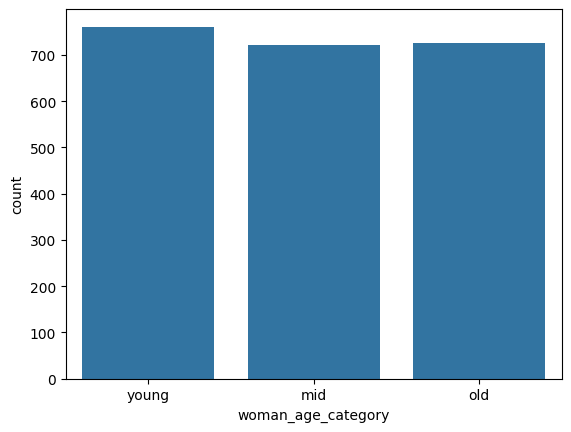

In [59]:
sns.countplot(data=divorce, x='woman_age_category')

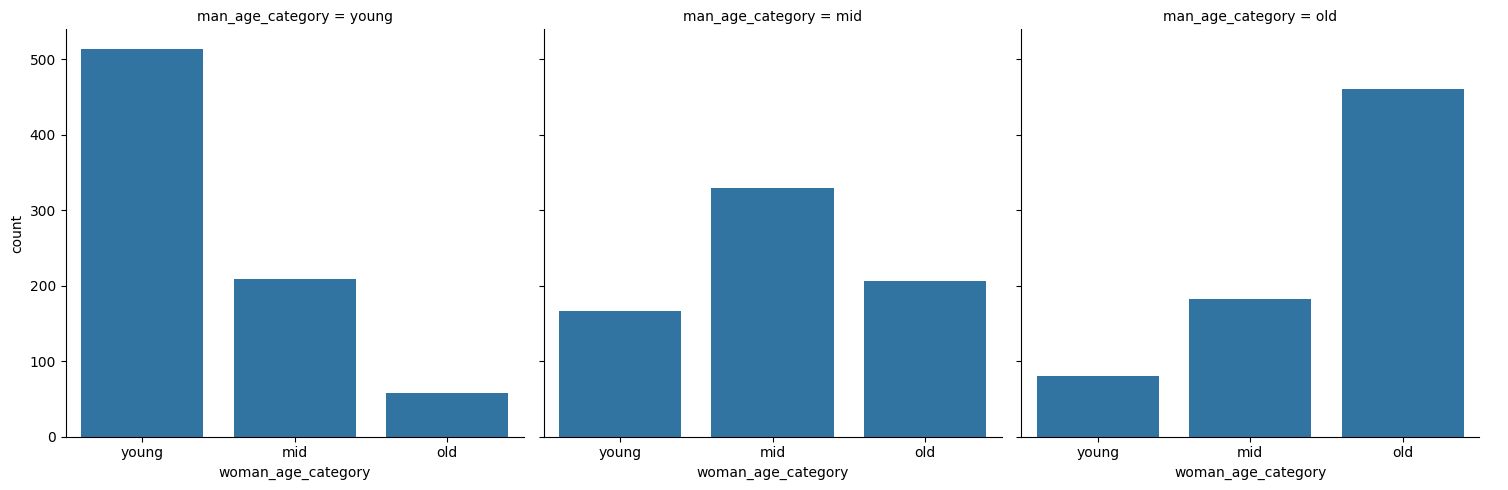

In [60]:
sns.catplot(data=divorce, x='woman_age_category', kind='count', col='man_age_category')